<a href="https://colab.research.google.com/github/Anup0m/-Farzi_Time-Series_Clustering/blob/main/Covid19_Cases.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install --upgrade pandas matplotlib scikit-learn



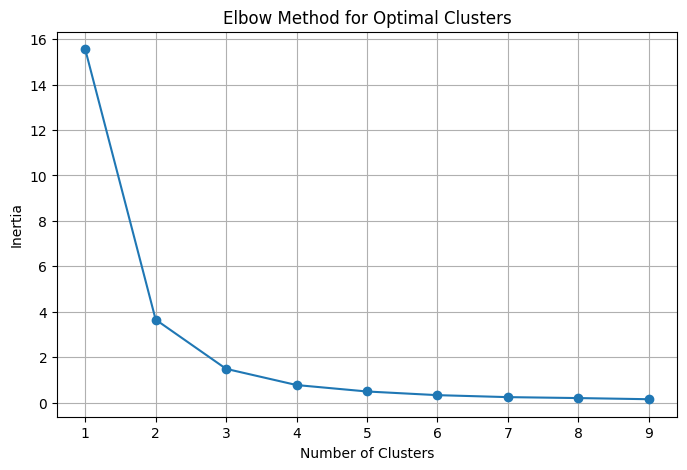

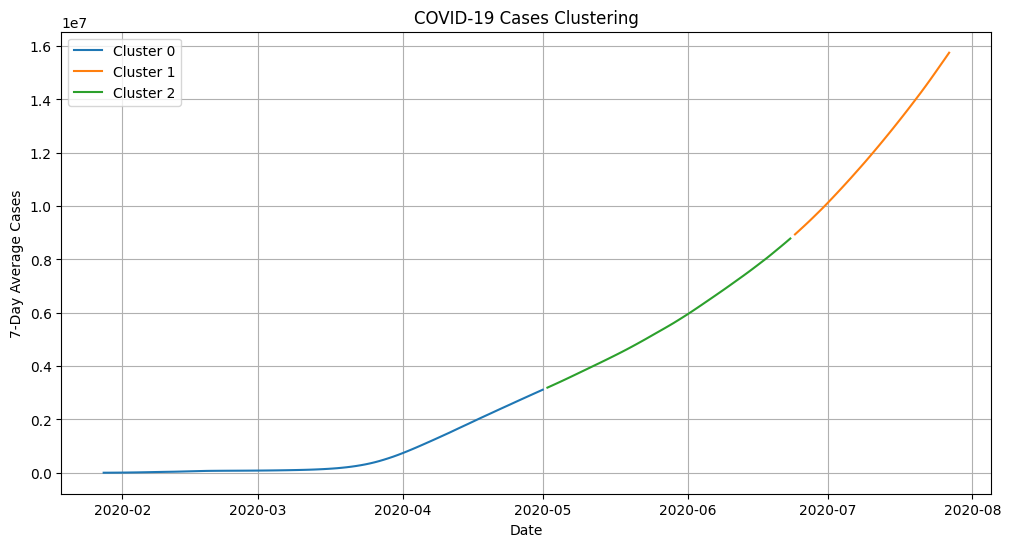

,Date,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,No. of countries,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,7_day_avg,Normalized_Cases,Cluster
0,2020-01-22,555,17,28,510,0,0,0,6,3.063063,5.045045,60.714286,NaN,0.0,0
1,2020-01-23,654,18,30,606,99,1,2,8,2.752294,4.587156,60.000000,NaN,0.0,0
2,2020-01-24,941,26,36,879,287,8,6,9,2.763018,3.825717,72.222222,NaN,0.0,0
3,2020-01-25,1434,42,39,1353,493,16,3,11,2.928870,2.719665,107.692308,NaN,0.0,0
4,2020-01-26,2118,56,52,2010,684,14,13,13,2.644004,2.455146,107.692308,NaN,0.0,0


from matplotlib import pyplot as plt
_df_32['Confirmed'].plot(kind='hist', bins=20, title='Confirmed')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_33['Deaths'].plot(kind='hist', bins=20, title='Deaths')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_34['Recovered'].plot(kind='hist', bins=20, title='Recovered')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_35['Active'].plot(kind='hist', bins=20, title='Active')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_36.plot(kind='scatter', x='Confirmed', y='Deaths', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_37.plot(kind='scatter', x='Deaths', y='Recovered', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_38.plot(kind='scatter', x='Recovered', y='Active', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_39.plot(kind='scatter', x='Active', y='New cases', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date']
  ys = series['New deaths']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_40.sort_values('Date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('New deaths')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date']
  ys = series['New recovered']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_41.sort_values('Date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('New recovered')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date']
  ys = series['Deaths / 100 Cases']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_42.sort_values('Date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('Deaths / 100 Cases')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date']
  ys = series['Recovered / 100 Cases']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_43.sort_values('Date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('Recovered / 100 Cases')

from matplotlib import pyplot as plt
_df_44['Confirmed'].plot(kind='line', figsize=(8, 4), title='Confirmed')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_45['Deaths'].plot(kind='line', figsize=(8, 4), title='Deaths')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_46['Recovered'].plot(kind='line', figsize=(8, 4), title='Recovered')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_47['Active'].plot(kind='line', figsize=(8, 4), title='Active')
plt.gca().spines[['top', 'right']].set_visible(False)

In [6]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

# Step 1: Simulate COVID-19 Dataset

data = pd.read_csv('day_wise.csv')


data['Date'] = pd.to_datetime(data['Date'])  # column names
data = data.groupby('Date').sum().reset_index()  # Aggregate by date
data = data[['Date', 'Confirmed', 'Deaths', 'Recovered', 'Active', 'New cases', 'New deaths', 'New recovered', 'No. of countries']]

# Calculate the additional metrics
data['Deaths / 100 Cases'] = (data['Deaths'] / data['Confirmed']) * 100
data['Recovered / 100 Cases'] = (data['Recovered'] / data['Confirmed']) * 100
data['Deaths / 100 Recovered'] = (data['Deaths'] / data['Recovered']) * 100



# Step 2: Data Cleaning and Preparation
data['7_day_avg'] = data['Confirmed'].rolling(window=7).mean()

# Normalize the data for clustering
scaler = MinMaxScaler()
data['Normalized_Cases'] = scaler.fit_transform(data[['7_day_avg']].fillna(0))

# Step 3: Clustering
# Determine optimal clusters using the Elbow Method
inertia = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data[['Normalized_Cases']].dropna())
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.figure(figsize=(8, 5))
plt.plot(range(1, 10), inertia, marker='o')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid()
plt.show()

# Apply K-Means clustering with the optimal number of clusters (e.g., 3)
optimal_clusters = 3
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
data['Cluster'] = kmeans.fit_predict(data[['Normalized_Cases']].fillna(0))

# Step 4: Visualization
plt.figure(figsize=(12, 6))
for cluster in range(optimal_clusters):
    cluster_data = data[data['Cluster'] == cluster]
    plt.plot(cluster_data['Date'], cluster_data['7_day_avg'], label=f'Cluster {cluster}')
plt.title('COVID-19 Cases Clustering')
plt.xlabel('Date')
plt.ylabel('7-Day Average Cases')
plt.legend()
plt.grid()
plt.show()

# Display the first few rows of the dataset with cluster labels
data.head()
